# 10 Minutes to pandas

This is a short introduction to pandas, geared mainly for new users. You can see more complex recipes in the [Cookbook](http://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook) 

Customarily, we import as follows:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

## Object Creation

See the [Data Structure Intro section](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dsintro) 

Creating a Series by passing a list of values, letting pandas create a default integer index:

In [3]:
s = pd.Series([1,3,5,np.nan,6,8])

In [4]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [5]:
y= s.copy()

In [6]:
s.dropna(inplace=True)

In [7]:
s

0    1.0
1    3.0
2    5.0
4    6.0
5    8.0
dtype: float64

In [8]:
y

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a DataFrame by passing a numpy array, with a datetime index and labeled columns:

In [9]:
y = s.copy()

In [10]:
y

0    1.0
1    3.0
2    5.0
4    6.0
5    8.0
dtype: float64

In [11]:
dates = pd.date_range('20130101', periods=6)

In [12]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [13]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

In [14]:
df

,A,B,C,D
2013-01-01,1.947216,0.469503,0.435593,1.164362
2013-01-02,0.279553,-0.624393,0.159441,0.598983
2013-01-03,-0.118338,-1.513964,-0.765449,0.298968
2013-01-04,0.022092,0.274004,0.478772,1.179082
2013-01-05,-0.170404,-0.530124,1.364443,-0.664792
2013-01-06,-0.105567,0.883538,1.125763,-1.181075


Creating a DataFrame by passing a dict of objects that can be converted to series-like.

In [15]:
df2 = pd.DataFrame({'A':1.,
                   'B':pd.Timestamp('20130102'),
                   'C':pd.Series(1,index=list(range(5)),dtype='float32'),
                   'D':np.array([3]*5,dtype='int32'),
                   'E':pd.Categorical(["test","train","test","train","Five"]),
                   'F':'foo'})

In [16]:
df2.shape

(5, 6)

In [17]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo
4,1.0,2013-01-02,1.0,3,Five,foo


In [18]:
df2.A

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: A, dtype: float64

Having specific [dtypes](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-dtypes)

In [19]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

If you’re using IPython, tab completion for column names (as well as public attributes) is automatically enabled. Here’s a subset of the attributes that will be completed:

In [20]:
# df2.<TAB>

As you can see, the columns A, B, C, and D are automatically tab completed. E is there as well; the rest of the attributes have been truncated for brevity.

## Viewing Data

See the [Basics section](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics) 

See the top & bottom rows of the frame

In [21]:
df.head(2)

,A,B,C,D
2013-01-01,1.947216,0.469503,0.435593,1.164362
2013-01-02,0.279553,-0.624393,0.159441,0.598983


In [22]:
df.tail()

,A,B,C,D
2013-01-02,0.279553,-0.624393,0.159441,0.598983
2013-01-03,-0.118338,-1.513964,-0.765449,0.298968
2013-01-04,0.022092,0.274004,0.478772,1.179082
2013-01-05,-0.170404,-0.530124,1.364443,-0.664792
2013-01-06,-0.105567,0.883538,1.125763,-1.181075


Display the index, columns, and the underlying numpy data

In [23]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [24]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [25]:
df.values

array([[ 1.94721564,  0.46950251,  0.43559335,  1.16436191],
       [ 0.27955297, -0.62439292,  0.15944074,  0.59898311],
       [-0.11833847, -1.51396443, -0.76544852,  0.29896834],
       [ 0.02209188,  0.27400361,  0.47877194,  1.17908177],
       [-0.17040367, -0.5301243 ,  1.36444345, -0.66479239],
       [-0.10556692,  0.88353759,  1.12576266, -1.18107527]])

Describe shows a quick statistic summary of your data

In [26]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.309092,-0.173573,0.466427,0.232588
std,0.818687,0.878450,0.755515,0.970200
min,-0.170404,-1.513964,-0.765449,-1.181075
25%,-0.115146,-0.600826,0.228479,-0.423852
50%,-0.041738,-0.128060,0.457183,0.448976
75%,0.215188,0.420628,0.964015,1.023017
max,1.947216,0.883538,1.364443,1.179082


Transposing your data

In [27]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,1.947216,0.279553,-0.118338,0.022092,-0.170404,-0.105567
B,0.469503,-0.624393,-1.513964,0.274004,-0.530124,0.883538
C,0.435593,0.159441,-0.765449,0.478772,1.364443,1.125763
D,1.164362,0.598983,0.298968,1.179082,-0.664792,-1.181075


Sorting by an axis

In [28]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,1.164362,0.435593,0.469503,1.947216
2013-01-02,0.598983,0.159441,-0.624393,0.279553
2013-01-03,0.298968,-0.765449,-1.513964,-0.118338
2013-01-04,1.179082,0.478772,0.274004,0.022092
2013-01-05,-0.664792,1.364443,-0.530124,-0.170404
2013-01-06,-1.181075,1.125763,0.883538,-0.105567


Sorting by value

In [29]:
df.sort_values(by='B')

,A,B,C,D
2013-01-03,-0.118338,-1.513964,-0.765449,0.298968
2013-01-02,0.279553,-0.624393,0.159441,0.598983
2013-01-05,-0.170404,-0.530124,1.364443,-0.664792
2013-01-04,0.022092,0.274004,0.478772,1.179082
2013-01-01,1.947216,0.469503,0.435593,1.164362
2013-01-06,-0.105567,0.883538,1.125763,-1.181075


## Selection

**Note:** While standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, .at, .iat, .loc, .iloc and .ix.

See the indexing documentation [Indexing and Selecting Data](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing) and [MultiIndex / Advanced Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced)

### Getting

Selecting a single column, which yields a Series, equivalent to df.A

In [30]:
df['A']

2013-01-01    1.947216
2013-01-02    0.279553
2013-01-03   -0.118338
2013-01-04    0.022092
2013-01-05   -0.170404
2013-01-06   -0.105567
Freq: D, Name: A, dtype: float64

Selecting via [], which slices the rows.

In [31]:
df[0:3]

,A,B,C,D
2013-01-01,1.947216,0.469503,0.435593,1.164362
2013-01-02,0.279553,-0.624393,0.159441,0.598983
2013-01-03,-0.118338,-1.513964,-0.765449,0.298968


In [32]:
df['20130107':'20130109']

,A,B,C,D


### Selection by Label

See more in [Selection by Label](Selection by Label)

For getting a cross section using a label

In [33]:
df.loc[dates[0]]

A    1.947216
B    0.469503
C    0.435593
D    1.164362
Name: 2013-01-01 00:00:00, dtype: float64

Selection by Label

In [34]:
df.loc[:,['A','B']]

,A,B
2013-01-01,1.947216,0.469503
2013-01-02,0.279553,-0.624393
2013-01-03,-0.118338,-1.513964
2013-01-04,0.022092,0.274004
2013-01-05,-0.170404,-0.530124
2013-01-06,-0.105567,0.883538


Showing label slicing, both endpoints are included

In [35]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,0.279553,-0.624393
2013-01-03,-0.118338,-1.513964
2013-01-04,0.022092,0.274004


Reduction in the dimensions of the returned object

In [36]:
df.loc["2013-01-02"]

A    0.279553
B   -0.624393
C    0.159441
D    0.598983
Name: 2013-01-02 00:00:00, dtype: float64

In [37]:
df["A"]

2013-01-01    1.947216
2013-01-02    0.279553
2013-01-03   -0.118338
2013-01-04    0.022092
2013-01-05   -0.170404
2013-01-06   -0.105567
Freq: D, Name: A, dtype: float64

In [38]:
df.loc['20130102',['A','B']]

A    0.279553
B   -0.624393
Name: 2013-01-02 00:00:00, dtype: float64

For getting a scalar value

In [39]:
type(df.loc[dates[0],'A'])

numpy.float64

### Selection by Position

See more in [Selection by Position](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-integer)

Select via the position of the passed integers

In [40]:
df.iloc[3]

A    0.022092
B    0.274004
C    0.478772
D    1.179082
Name: 2013-01-04 00:00:00, dtype: float64

By integer slices, acting similar to numpy/python

In [41]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,0.022092,0.274004
2013-01-05,-0.170404,-0.530124


By lists of integer position locations, similar to the numpy/python style

In [42]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,0.279553,0.159441
2013-01-03,-0.118338,-0.765449
2013-01-05,-0.170404,1.364443


For slicing rows explicitly

In [43]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,0.279553,-0.624393,0.159441,0.598983
2013-01-03,-0.118338,-1.513964,-0.765449,0.298968


For slicing columns explicitly

In [44]:
df.iloc[:,1:3]

,B,C
2013-01-01,0.469503,0.435593
2013-01-02,-0.624393,0.159441
2013-01-03,-1.513964,-0.765449
2013-01-04,0.274004,0.478772
2013-01-05,-0.530124,1.364443
2013-01-06,0.883538,1.125763


For getting a value explicitly

In [45]:
df.iloc[1,1]

-0.6243929213477278

For getting fast access to a scalar (equiv to the prior method)

In [46]:
df.iat[1,1]

-0.6243929213477278

## Boolean Indexing

Using a single column’s values to select data.

In [47]:
x= df.A>0

In [48]:
x

2013-01-01     True
2013-01-02     True
2013-01-03    False
2013-01-04     True
2013-01-05    False
2013-01-06    False
Freq: D, Name: A, dtype: bool

In [49]:
df[df["A"]>0]

,A,B,C,D
2013-01-01,1.947216,0.469503,0.435593,1.164362
2013-01-02,0.279553,-0.624393,0.159441,0.598983
2013-01-04,0.022092,0.274004,0.478772,1.179082


In [50]:
df[df.A > 0]

,A,B,C,D
2013-01-01,1.947216,0.469503,0.435593,1.164362
2013-01-02,0.279553,-0.624393,0.159441,0.598983
2013-01-04,0.022092,0.274004,0.478772,1.179082


A where operation for getting.

In [51]:
df[df > 0]

,A,B,C,D
2013-01-01,1.947216,0.469503,0.435593,1.164362
2013-01-02,0.279553,NaN,0.159441,0.598983
2013-01-03,NaN,NaN,NaN,0.298968
2013-01-04,0.022092,0.274004,0.478772,1.179082
2013-01-05,NaN,NaN,1.364443,NaN
2013-01-06,NaN,0.883538,1.125763,NaN


Using the isin() method for filtering:

In [52]:
df2 = df.copy()

In [53]:
df2['E'] = ['one','one', 'two','three','four','three']

In [54]:
df2['F'] = df2["A"] + df2["B"]

In [55]:
df2

,A,B,C,D,E,F
2013-01-01,1.947216,0.469503,0.435593,1.164362,one,2.416718
2013-01-02,0.279553,-0.624393,0.159441,0.598983,one,-0.344840
2013-01-03,-0.118338,-1.513964,-0.765449,0.298968,two,-1.632303
2013-01-04,0.022092,0.274004,0.478772,1.179082,three,0.296095
2013-01-05,-0.170404,-0.530124,1.364443,-0.664792,four,-0.700528
2013-01-06,-0.105567,0.883538,1.125763,-1.181075,three,0.777971


In [56]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E,F
2013-01-03,-0.118338,-1.513964,-0.765449,0.298968,two,-1.632303
2013-01-05,-0.170404,-0.530124,1.364443,-0.664792,four,-0.700528


## Setting

Setting a new column automatically aligns the data by the indexes

In [57]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102',periods=6))

In [58]:
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [59]:
df['F'] = s1

In [60]:
df

,A,B,C,D,F
2013-01-01,1.947216,0.469503,0.435593,1.164362,NaN
2013-01-02,0.279553,-0.624393,0.159441,0.598983,1.0
2013-01-03,-0.118338,-1.513964,-0.765449,0.298968,2.0
2013-01-04,0.022092,0.274004,0.478772,1.179082,3.0
2013-01-05,-0.170404,-0.530124,1.364443,-0.664792,4.0
2013-01-06,-0.105567,0.883538,1.125763,-1.181075,5.0


Setting values by label

In [61]:
df.at[dates[0],'A'] = 0

Settomg values by position

In [62]:
df.iat[0,1] = 0

In [63]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.435593,1.164362,NaN
2013-01-02,0.279553,-0.624393,0.159441,0.598983,1.0
2013-01-03,-0.118338,-1.513964,-0.765449,0.298968,2.0
2013-01-04,0.022092,0.274004,0.478772,1.179082,3.0
2013-01-05,-0.170404,-0.530124,1.364443,-0.664792,4.0
2013-01-06,-0.105567,0.883538,1.125763,-1.181075,5.0


Setting by assigning with a numpy array

In [64]:
df.loc[:,'D'] = np.array([5] * len(df))

The result of the prior setting operations

In [65]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.435593,5,NaN
2013-01-02,0.279553,-0.624393,0.159441,5,1.0
2013-01-03,-0.118338,-1.513964,-0.765449,5,2.0
2013-01-04,0.022092,0.274004,0.478772,5,3.0
2013-01-05,-0.170404,-0.530124,1.364443,5,4.0
2013-01-06,-0.105567,0.883538,1.125763,5,5.0


A where operation with setting.

In [66]:
df2 = df.copy()

In [67]:
df2[df2 > 0] = -df2

In [68]:
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.435593,-5,NaN
2013-01-02,-0.279553,-0.624393,-0.159441,-5,-1.0
2013-01-03,-0.118338,-1.513964,-0.765449,-5,-2.0
2013-01-04,-0.022092,-0.274004,-0.478772,-5,-3.0
2013-01-05,-0.170404,-0.530124,-1.364443,-5,-4.0
2013-01-06,-0.105567,-0.883538,-1.125763,-5,-5.0


## Missing Data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations. See the Missing Data section

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [69]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])

In [70]:
df1


,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.435593,5,NaN,NaN
2013-01-02,0.279553,-0.624393,0.159441,5,1.0,NaN
2013-01-03,-0.118338,-1.513964,-0.765449,5,2.0,NaN
2013-01-04,0.022092,0.274004,0.478772,5,3.0,NaN


In [71]:
df1.loc[dates[0]:dates[1],'E'] = 1

In [72]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.435593,5,NaN,1.0
2013-01-02,0.279553,-0.624393,0.159441,5,1.0,1.0
2013-01-03,-0.118338,-1.513964,-0.765449,5,2.0,NaN
2013-01-04,0.022092,0.274004,0.478772,5,3.0,NaN


To drop any rows that have missing data.

In [73]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,0.279553,-0.624393,0.159441,5,1.0,1.0


In [74]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.435593,5,NaN,1.0
2013-01-02,0.279553,-0.624393,0.159441,5,1.0,1.0
2013-01-03,-0.118338,-1.513964,-0.765449,5,2.0,NaN
2013-01-04,0.022092,0.274004,0.478772,5,3.0,NaN


Filling missing data

In [75]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.435593,5,5.0,1.0
2013-01-02,0.279553,-0.624393,0.159441,5,1.0,1.0
2013-01-03,-0.118338,-1.513964,-0.765449,5,2.0,5.0
2013-01-04,0.022092,0.274004,0.478772,5,3.0,5.0


To get the boolean mask where values are nan

In [76]:
pd.isnull(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## Operations

See the [Basic section on Binary Ops](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-binop)

### Stats

Operations in general exclude missing data.

Performing a descriptive statistic

In [77]:
df.mean()

A   -0.015444
B   -0.251823
C    0.466427
D    5.000000
F    3.000000
dtype: float64

Same operation on the other axis

In [78]:
df.mean(1)

2013-01-01    1.358898
2013-01-02    1.162920
2013-01-03    0.920450
2013-01-04    1.754973
2013-01-05    1.932783
2013-01-06    2.380747
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension.

In [79]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)

In [80]:
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [81]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.435593,5,NaN
2013-01-02,0.279553,-0.624393,0.159441,5,1.0
2013-01-03,-0.118338,-1.513964,-0.765449,5,2.0
2013-01-04,0.022092,0.274004,0.478772,5,3.0
2013-01-05,-0.170404,-0.530124,1.364443,5,4.0
2013-01-06,-0.105567,0.883538,1.125763,5,5.0


In [82]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-1.118338,-2.513964,-1.765449,4.0,1.0
2013-01-04,-2.977908,-2.725996,-2.521228,2.0,0.0
2013-01-05,-5.170404,-5.530124,-3.635557,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### Apply

Applying functions to the data

In [83]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.435593,5,NaN
2013-01-02,0.279553,-0.624393,0.159441,5,1.0
2013-01-03,-0.118338,-1.513964,-0.765449,5,2.0
2013-01-04,0.022092,0.274004,0.478772,5,3.0
2013-01-05,-0.170404,-0.530124,1.364443,5,4.0
2013-01-06,-0.105567,0.883538,1.125763,5,5.0


In [84]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.435593,5,NaN
2013-01-02,0.279553,-0.624393,0.595034,10,1.0
2013-01-03,0.161214,-2.138357,-0.170414,15,3.0
2013-01-04,0.183306,-1.864354,0.308358,20,6.0
2013-01-05,0.012903,-2.394478,1.672801,25,10.0
2013-01-06,-0.092664,-1.510940,2.798564,30,15.0


In [85]:
df.apply(lambda x: x.max() - x.min())

A    0.449957
B    2.397502
C    2.129892
D    0.000000
F    4.000000
dtype: float64

### Histogramming

See more at [Histogramming and Discretization](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-discretization)

In [86]:
s = pd.Series(np.random.randint(0, 7, size=10))

In [87]:
s

0    6
1    4
2    2
3    2
4    2
5    1
6    4
7    0
8    3
9    5
dtype: int64

In [88]:
s.value_counts()

2    3
4    2
6    1
5    1
3    1
1    1
0    1
dtype: int64

### String Methods

Series is equipped with a set of string processing methods in the str attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in str generally uses [regular expressions](https://docs.python.org/2/library/re.html) by default (and in some cases always uses them). See more at [Vectorized String Methods](http://pandas.pydata.org/pandas-docs/stable/text.html#text-string-methods).

In [89]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [90]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge

### Concat

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

See the [Merging section](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging)

Concatenating pandas objects together with concat():

In [91]:
df = pd.DataFrame(np.random.randn(10, 4))

In [92]:
df

,0,1,2,3
0,-0.149836,-0.386094,-1.066435,0.732597
1,0.651635,-0.689409,-1.321417,0.029419
2,-0.173277,1.186214,0.204395,-1.510325
3,-0.270885,1.315981,-0.006025,0.774569
4,-0.241153,-0.399357,0.192538,-0.632518
5,0.626649,-1.407081,0.184632,0.880486
6,-2.673159,-0.831030,-2.158734,2.082117
7,-1.619369,1.585516,-1.546283,-1.444615
8,1.164418,0.128461,1.215678,0.648336
9,0.138623,-0.364001,-0.956139,0.529139


In [93]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]

In [94]:
pieces

[          0         1         2         3
 0 -0.149836 -0.386094 -1.066435  0.732597
 1  0.651635 -0.689409 -1.321417  0.029419
 2 -0.173277  1.186214  0.204395 -1.510325,
           0         1         2         3
 3 -0.270885  1.315981 -0.006025  0.774569
 4 -0.241153 -0.399357  0.192538 -0.632518
 5  0.626649 -1.407081  0.184632  0.880486
 6 -2.673159 -0.831030 -2.158734  2.082117,
           0         1         2         3
 7 -1.619369  1.585516 -1.546283 -1.444615
 8  1.164418  0.128461  1.215678  0.648336
 9  0.138623 -0.364001 -0.956139  0.529139]

In [95]:
pd.concat(pieces)

,0,1,2,3
0,-0.149836,-0.386094,-1.066435,0.732597
1,0.651635,-0.689409,-1.321417,0.029419
2,-0.173277,1.186214,0.204395,-1.510325
3,-0.270885,1.315981,-0.006025,0.774569
4,-0.241153,-0.399357,0.192538,-0.632518
5,0.626649,-1.407081,0.184632,0.880486
6,-2.673159,-0.831030,-2.158734,2.082117
7,-1.619369,1.585516,-1.546283,-1.444615
8,1.164418,0.128461,1.215678,0.648336
9,0.138623,-0.364001,-0.956139,0.529139


### Join

SQL style merges. See the [Database style joining](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging-join)

In [96]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})

In [97]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [98]:
left

,key,lval
0,foo,1
1,foo,2


In [99]:
right

,key,rval
0,foo,4
1,foo,5


In [100]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


### Append

Append rows to a dataframe. See the [Appending](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging-concatenation)

In [101]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])

In [102]:
df

,A,B,C,D
0,-1.281905,0.179474,-0.152529,1.100160
1,-0.284798,1.511673,-0.481559,0.862495
2,-0.867450,-0.044951,-1.572690,-2.478339
3,0.230663,-0.082967,0.445887,-0.290054
4,0.500738,0.114009,-0.366525,-0.006425
5,-0.062857,1.035578,-1.386280,0.160774
6,-1.004933,0.828278,-0.643906,0.302342
7,-0.240562,-0.700284,-0.758504,0.849610


In [103]:
s = df.iloc[3]

In [104]:
df.append(s, ignore_index=True)

,A,B,C,D
0,-1.281905,0.179474,-0.152529,1.100160
1,-0.284798,1.511673,-0.481559,0.862495
2,-0.867450,-0.044951,-1.572690,-2.478339
3,0.230663,-0.082967,0.445887,-0.290054
4,0.500738,0.114009,-0.366525,-0.006425
5,-0.062857,1.035578,-1.386280,0.160774
6,-1.004933,0.828278,-0.643906,0.302342
7,-0.240562,-0.700284,-0.758504,0.849610
8,0.230663,-0.082967,0.445887,-0.290054


## Grouping

By “group by” we are referring to a process involving one or more of the following steps

* **Splitting** the data into groups based on some criteria
* **Applying** a function to each group independently
* **Combining** the results into a data structure

See the [Grouping section](http://pandas.pydata.org/pandas-docs/stable/groupby.html#groupby)

In [105]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
                                    'B' : ['one', 'one', 'two', 'three','two', 'two', 'one', 'three'],
                                    'C' : np.random.randn(8),
                                     'D' : np.random.randn(8)})

In [106]:
df

,A,B,C,D
0,foo,one,0.384282,0.328775
1,bar,one,-0.136727,-0.748386
2,foo,two,0.878447,0.747615
3,bar,three,1.598771,-0.270344
4,foo,two,1.088730,0.903006
5,bar,two,0.438755,-0.173017
6,foo,one,-0.207968,0.509510
7,foo,three,-0.193337,-0.195305


Grouping and then applying a function sum to the resulting groups.

In [107]:
df.groupby('A').sum()

,C,D
A,,
bar,1.900800,-1.191747
foo,1.950154,2.293601


In [108]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -0.136727 -0.748386
    three  1.598771 -0.270344
    two    0.438755 -0.173017
foo one    0.176314  0.838285
    three -0.193337 -0.195305
    two    1.967177  1.650621

## Reshaping

See the sections on [Hierarchical Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced-hierarchical) and [Reshaping](http://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-stacking).

### Stack

In [109]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
                                ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]))

In [110]:
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [111]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

In [112]:
index

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])

In [113]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

In [114]:
df

A         B
first second                    
bar   one    -0.327014  2.664173
      two    -0.586903 -0.064054
baz   one    -0.351228 -0.116210
      two     1.256789 -0.072139
foo   one    -1.632400 -0.950983
      two    -1.438815  0.099110
qux   one     0.575758  0.280729
      two    -1.145416 -1.084275

In [115]:
df2 = df[:4]

In [116]:
df2

A         B
first second                    
bar   one    -0.327014  2.664173
      two    -0.586903 -0.064054
baz   one    -0.351228 -0.116210
      two     1.256789 -0.072139

The stack() method “compresses” a level in the DataFrame’s columns.

In [117]:
stacked = df2.stack()

In [118]:
stacked

first  second   
bar    one     A   -0.327014
               B    2.664173
       two     A   -0.586903
               B   -0.064054
baz    one     A   -0.351228
               B   -0.116210
       two     A    1.256789
               B   -0.072139
dtype: float64

With a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of stack() is unstack(), which by default unstacks the **last level**:

In [119]:
stacked.unstack()

A         B
first second                    
bar   one    -0.327014  2.664173
      two    -0.586903 -0.064054
baz   one    -0.351228 -0.116210
      two     1.256789 -0.072139

In [120]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.327014 -0.586903
      B  2.664173 -0.064054
baz   A -0.351228  1.256789
      B -0.116210 -0.072139

In [121]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.327014 -0.351228
       B  2.664173 -0.116210
two    A -0.586903  1.256789
       B -0.064054 -0.072139

### Pivot Tables

See the section on [Pivot Tables](http://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-pivot).

In [122]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                                    'B' : ['A', 'B', 'C'] * 4,
                                    'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                                    'D' : np.random.randn(12),
                                    'E' : np.random.randn(12)})

In [123]:
df

,A,B,C,D,E
0,one,A,foo,-0.782921,-0.294383
1,one,B,foo,-0.058820,-2.269967
2,two,C,foo,-0.723055,1.179643
3,three,A,bar,0.364552,-1.870828
4,one,B,bar,-0.730189,-1.696397
5,one,C,bar,-1.012240,0.753018
6,two,A,foo,-2.209748,-0.709043
7,three,B,foo,-0.851913,1.653232
8,one,C,foo,1.394470,-0.193284
9,one,A,bar,0.504762,-0.045594


We can produce pivot tables from this data very easily:

In [124]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  0.504762 -0.782921
      B -0.730189 -0.058820
      C -1.012240  1.394470
three A  0.364552       NaN
      B       NaN -0.851913
      C -0.287307       NaN
two   A       NaN -2.209748
      B  1.755666       NaN
      C       NaN -0.723055

## Time Series

pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the [Time Series section](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries)

In [125]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')

In [126]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [127]:
ts.resample('5Min').sum()

2012-01-01    24686
Freq: 5T, dtype: int64

Time zone representation

In [128]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')

In [129]:
ts = pd.Series(np.random.randn(len(rng)), rng)

In [130]:
ts

2012-03-06   -0.628844
2012-03-07   -1.264107
2012-03-08    0.851034
2012-03-09    1.375716
2012-03-10    0.422435
Freq: D, dtype: float64

In [131]:
ts_utc = ts.tz_localize('UTC')

In [132]:
ts_utc

2012-03-06 00:00:00+00:00   -0.628844
2012-03-07 00:00:00+00:00   -1.264107
2012-03-08 00:00:00+00:00    0.851034
2012-03-09 00:00:00+00:00    1.375716
2012-03-10 00:00:00+00:00    0.422435
Freq: D, dtype: float64


Convert to another time zone

In [133]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -0.628844
2012-03-06 19:00:00-05:00   -1.264107
2012-03-07 19:00:00-05:00    0.851034
2012-03-08 19:00:00-05:00    1.375716
2012-03-09 19:00:00-05:00    0.422435
Freq: D, dtype: float64


Converting between time span representations

In [134]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')

In [135]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [136]:
ts

2012-01-31    0.853227
2012-02-29    0.706419
2012-03-31    1.256958
2012-04-30   -0.502250
2012-05-31   -0.311594
Freq: M, dtype: float64

In [137]:
ps = ts.to_period()

In [138]:
ps

2012-01    0.853227
2012-02    0.706419
2012-03    1.256958
2012-04   -0.502250
2012-05   -0.311594
Freq: M, dtype: float64

In [139]:
ps.to_timestamp()

2012-01-01    0.853227
2012-02-01    0.706419
2012-03-01    1.256958
2012-04-01   -0.502250
2012-05-01   -0.311594
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [140]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')

In [141]:
ts = pd.Series(np.random.randn(len(prng)), prng)

In [142]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9

In [143]:
ts.head()

1990-03-01 09:00    1.029050
1990-06-01 09:00    0.061174
1990-09-01 09:00    2.356258
1990-12-01 09:00   -0.035235
1991-03-01 09:00    0.852435
Freq: H, dtype: float64

## Categoricals

Since version 0.15, pandas can include categorical data in a DataFrame. For full docs, see the [categorical introduction](http://pandas.pydata.org/pandas-docs/stable/categorical.html#categorical) and the [API documentation](http://pandas.pydata.org/pandas-docs/stable/api.html#api-categorical).

In [144]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

Convert the raw grades to a categorical data type.

In [145]:
df["grade"] = df["raw_grade"].astype("category")

In [146]:
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

Rename the categories to more meaningful names (assigning to Series.cat.categories is inplace!)

In [147]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

Reorder the categories and simultaneously add the missing categories (methods under Series .cat return a new Series per default).

In [148]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])

In [149]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

Sorting is per order in the categories, not lexical order.

In [150]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


Grouping by a categorical column shows also empty categories.

In [151]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting
[Plotting](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization) docs.

In [152]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

In [153]:
ts = ts.cumsum()

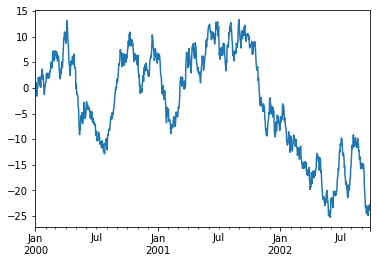

In [154]:
ts.plot()

On DataFrame, plot() is a convenience to plot all of the columns with labels:

In [155]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])

In [156]:
df = df.cumsum()

<Figure size 432x288 with 0 Axes>

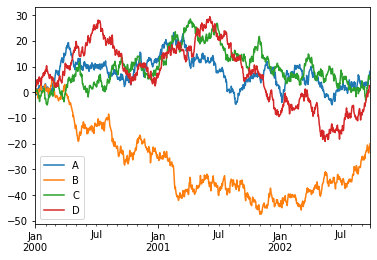

In [157]:
plt.figure(); df.plot(); plt.legend(loc='best')

## Getting Data In/Out

### CSV
[Writing to a csv file](http://pandas.pydata.org/pandas-docs/stable/io.html#io-store-in-csv)

In [158]:
df.to_csv('foo.csv')

[Reading from a csv file](http://pandas.pydata.org/pandas-docs/stable/io.html#io-read-csv-table)

In [159]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.314715,1.087505,0.199233,1.069740
1,2000-01-02,0.534034,0.240234,1.515644,1.595924
2,2000-01-03,-0.196188,0.399066,0.686525,2.397371
3,2000-01-04,-0.986846,0.010394,0.605994,2.549560
4,2000-01-05,-0.475895,-0.371504,0.475682,2.587640
...,...,...,...,...,...
995,2002-09-22,5.624261,-23.618918,6.646702,-0.178405
996,2002-09-23,5.913408,-23.384008,5.136344,1.247632
997,2002-09-24,5.533442,-21.389652,5.225849,2.638061
998,2002-09-25,7.858900,-21.363020,6.080205,2.631833


### HDF5
Reading and writing to [HDFStores](http://pandas.pydata.org/pandas-docs/stable/io.html#io-hdf5)

Writing to a HDF5 Store

In [ ]:
df.to_hdf('foo.h5','df')

Reading from a HDF5 Store

In [ ]:
pd.read_hdf('foo.h5','df')

### Excel

Reading and writing to [MS Excel](http://pandas.pydata.org/pandas-docs/stable/io.html#io-excel)

Writing to an excel file

In [ ]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

Reading from an excel file

In [ ]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

### Gotchas
If you are trying an operation and you see an exception like:

In [163]:
if pd.Series([False, True, False]):
    print("I was true")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

See [Comparisons](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-compare) for an explanation and what to do.

See [Gotchas](http://pandas.pydata.org/pandas-docs/stable/gotchas.html#gotchas) as well.

**Reference:** http://pandas.pydata.org/pandas-docs/stable/10min.html